In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [3]:
data=pd.read_csv("iris.csv")
print(data)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [27]:
data=data[["SepalLengthCm","SepalWidthCm"]]
data1=data
x=data.iloc[:,0:2]
print(x)

     SepalLengthCm  SepalWidthCm
0              5.1           3.5
1              4.9           3.0
2              4.7           3.2
3              4.6           3.1
4              5.0           3.6
..             ...           ...
145            6.7           3.0
146            6.3           2.5
147            6.5           3.0
148            6.2           3.4
149            5.9           3.0

[150 rows x 2 columns]


In [23]:
distance=[]
for i in data.index:
    point1=np.array((data["SepalLengthCm"][i],data["SepalWidthCm"][i]))
    temp=[]
    for j in data1.index:
        point2=np.array((data1["SepalLengthCm"][j],data1["SepalWidthCm"][j]))
        temp.append(np.linalg.norm(point1-point2))
    distance.append(temp)
    
print(distance)

[[0.0, 0.5385164807134502, 0.4999999999999995, 0.6403124237432848, 0.1414213562373093, 0.5000000000000003, 0.5099019513592785, 0.1414213562373093, 0.9219544457292882, 0.44721359549995754, 0.3605551275463996, 0.31622776601683783, 0.58309518948453, 0.9433981132056602, 0.8602325267042628, 1.0816653826391973, 0.5000000000000003, 0.0, 0.6708203932499374, 0.2999999999999998, 0.31622776601683866, 0.20000000000000018, 0.5099019513592785, 0.20000000000000018, 0.31622776601683783, 0.5099019513592784, 0.1414213562373093, 0.10000000000000053, 0.14142135623730995, 0.4999999999999995, 0.49999999999999983, 0.31622776601683866, 0.6082762530298217, 0.8062257748298554, 0.44721359549995754, 0.31622776601683766, 0.40000000000000036, 0.44721359549995754, 0.8602325267042621, 0.10000000000000009, 0.09999999999999964, 1.3416407864998738, 0.7615773105863901, 0.09999999999999964, 0.2999999999999998, 0.58309518948453, 0.2999999999999998, 0.58309518948453, 0.2828427124746193, 0.22360679774997896, 1.92353840616713

In [22]:

def prim_adjacency_matrix(adj_matrix):
    num_vertices = len(adj_matrix)
    mst = [None] * num_vertices
    key = [float('inf')] * num_vertices
   
    in_mst = [False] * num_vertices
    
    
    key[0] = 0
    mst[0] = -1  
    
    
    for _ in range(num_vertices):
       
        min_key = float('inf')
        min_index = -1
        for v in range(num_vertices):
            if not in_mst[v] and key[v] < min_key:
                min_key = key[v]
                min_index = v
        
        
        in_mst[min_index] = True
        
        
        for v in range(num_vertices):
            if adj_matrix[min_index][v] and not in_mst[v] and adj_matrix[min_index][v] < key[v]:
                key[v] = adj_matrix[min_index][v]
                mst[v] = min_index
    
    
    mst_adj_matrix = [[0] * num_vertices for _ in range(num_vertices)]
    for i in range(1, num_vertices):
        mst_adj_matrix[i][mst[i]] = adj_matrix[i][mst[i]]
        mst_adj_matrix[mst[i]][i] = adj_matrix[i][mst[i]]
    
    return mst_adj_matrix



mst = prims_mst(distance) 
mst


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

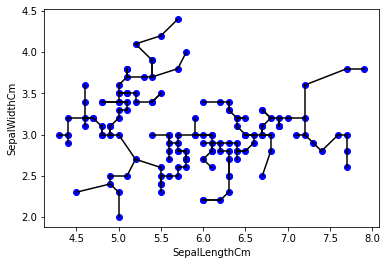

In [29]:
def plotgraph(data,graph,clusters=None):
    if clusters is None:
        plt.scatter(data.iloc[:,0],data.iloc[:,1],c='blue')
    else:
        for i in range(len(clusters)):
             plt.scatter(data.iloc[list(clusters[i]),0],data.iloc[list(clusters[i]),1])
    
    for i in range(graph.shape[0]):
        for j in range(graph.shape[1]):
            if graph[i,j] != 0:
                plt.plot([data.iloc[i,0],data.iloc[j,0]],[data.iloc[i,1],data.iloc[j,1]],c='black')        
    
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1]) 
    
    
plotgraph(data,mst)
plt.show()
        

In [30]:
max_distances = np.unravel_index(np.argsort(mst, axis=None)[-2:], mst.shape)
max_distances


(array([ 57, 109], dtype=int64), array([ 41, 117], dtype=int64))

In [34]:
m1=mst.copy()
m1[max_distances]=0

g=nx.from_numpy_matrix(m1)
connected=list(nx.connected_components(g))
print(connected)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149}, {41}, {131, 117}]


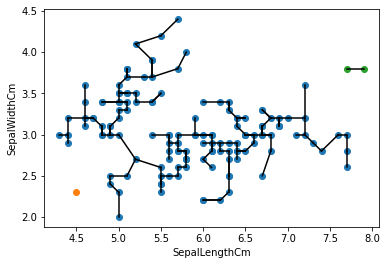

In [35]:
plotgraph(data,m1,connected)
plt.show()